<h1 align=center><font size="5"> SVM (Support Vector Machines)</font></h1>

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#load_dataset">Import the Data</a></li>
        <li><a href="#data_preprocessing">Data Preprocessing</a></li>
        <li><a href="#modeling">Modeling</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
    </ol>
</div>
<br>
<hr>

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.style.use('ggplot')
%matplotlib inline 

<h2 id="load_dataset">Import the Data</h2>

In [59]:
df = pd.read_csv("cell_samples.csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


<h2 id="data_preprocessing">Data Preprocessing</h2>

In [60]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

Note, the BareNuc is an object, so will change in datatype.

In [61]:
#change the datatypes 
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int64')

Text(0, 0.5, 'Counts')

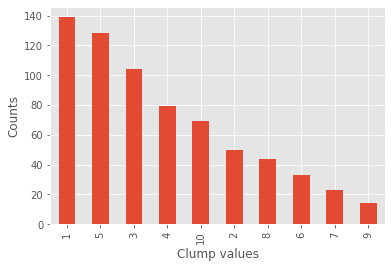

In [62]:
#data visualization
df['Clump'].value_counts().plot(kind='bar')
plt.xlabel('Clump values')
plt.ylabel('Counts')

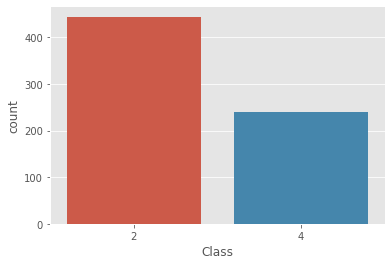

In [63]:
sns.countplot(df['Class'])

<h2 id="modeling">Modeling</h2>

In [64]:
X = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
y = df['Class']

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [66]:
print('Train set:')
print(X_train.shape)
print(y_train.shape)
print('Test set:')
print(X_test.shape)
print(y_test.shape)

Train set:
(478, 9)
(478,)
Test set:
(205, 9)
(205,)


In [67]:
from sklearn import svm

clf = svm.SVC(kernel='linear').fit(X_train, y_train)

In [68]:
pred = clf.predict(X_test)
pred

array([2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2,
       2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4,
       2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4,
       4, 4, 2, 4, 2, 4, 2, 4, 2, 4, 4, 2, 4, 4, 2, 4, 2, 2, 4, 4, 2, 4,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2, 4, 2, 4, 2, 4, 4,
       4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 4, 2,
       2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2,
       2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2,
       2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 4], dtype=int64)

<h2 id="evaluation">Evaluation</h2>

In [69]:
from sklearn.metrics import accuracy_score,f1_score,r2_score,jaccard_similarity_score

print("Accuracy score: ", accuracy_score(y_test, pred))
print("R2 score: ", r2_score(y_test, pred))
print("Jaccard score: ", jaccard_similarity_score(y_test, pred))

Accuracy score:  0.9609756097560975
R2 score:  0.8336038961038961
Jaccard score:  0.9609756097560975


End of the Notebook...